# Real Estate Valuation

**Poro Burman**    
**November 1st, 2020**

> 1. The goal of this project is to predict the housing price using various regression models.

> 2. The dataset was taken from kaggle and the linkto the dataset can be found here [kaggle](https://www.kaggle.com/rhuebner/human-resources-data-set)

**1. Import libraries**

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

**2. Import dataset**

*a) dataset*

In [2]:
dataset = pd.read_excel('Real estate valuation data set.xlsx')

dataset

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.666667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250000,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000000,8.1,104.81010,5,24.96674,121.54067,52.5


*b) check for any null values*

In [3]:
dataset.isnull().values.any()

False

*c) view a pairplot for the dataset*

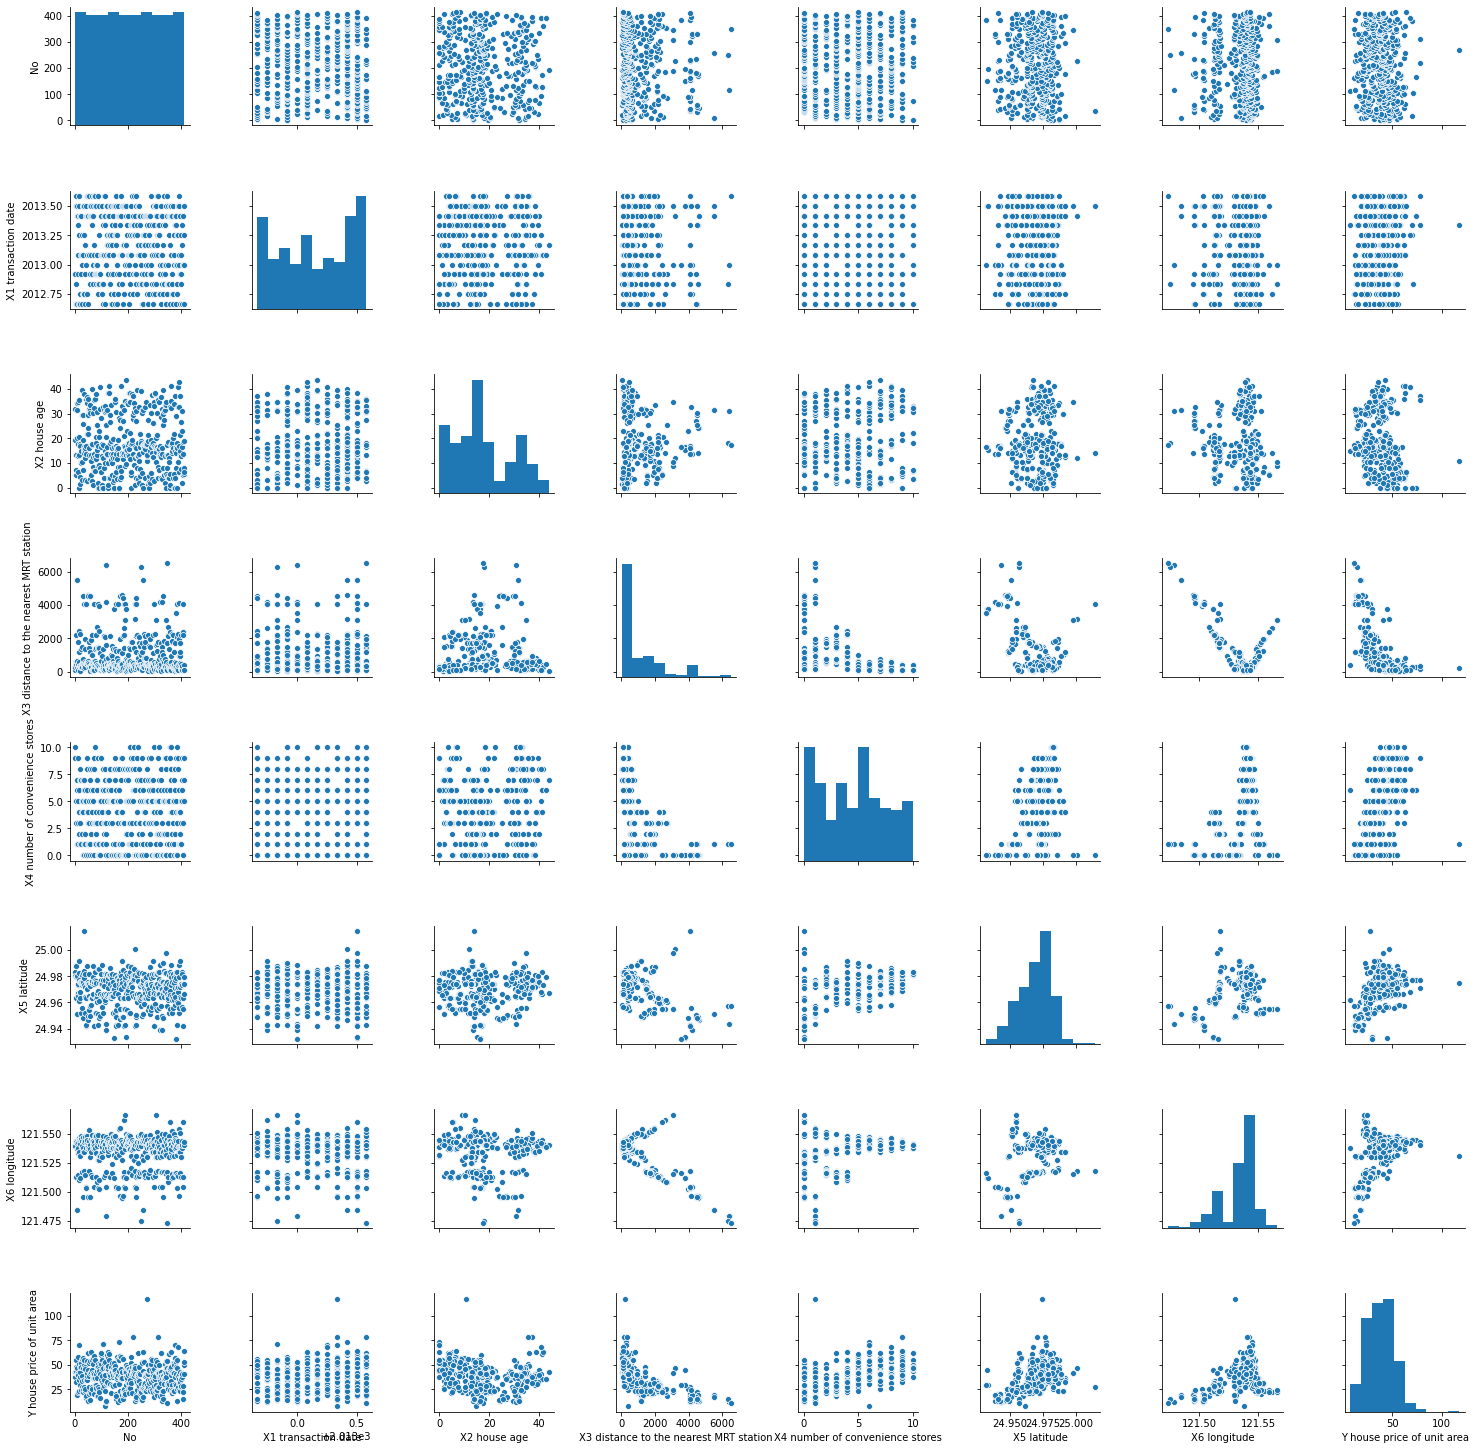

In [4]:
sns.pairplot(dataset)

> It seems that there seems to be a little positive correlation between house price and number of convenience stores and latitude. We'll go ahead and select only those columns.

*d) select the columns for further downstream analysis*

In [5]:
dataset = dataset[['X4 number of convenience stores', 'X5 latitude', 'Y house price of unit area']]

dataset

,X4 number of convenience stores,X5 latitude,Y house price of unit area
0,10,24.98298,37.9
1,9,24.98034,42.2
2,5,24.98746,47.3
3,5,24.98746,54.8
4,5,24.97937,43.1
...,...,...,...
409,0,24.94155,15.4
410,9,24.97433,50.0
411,7,24.97923,40.6
412,5,24.96674,52.5


**3. Data preprocessing**

*a) select dependent and independent variables*

In [6]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

y = y.reshape(len(y),1)

*b) view independent variables*

In [7]:
X

array([[10.     , 24.98298],
       [ 9.     , 24.98034],
       [ 5.     , 24.98746],
       [ 5.     , 24.98746],
       [ 5.     , 24.97937],
       [ 3.     , 24.96305],
       [ 7.     , 24.97933],
       [ 6.     , 24.98042],
       [ 1.     , 24.95095],
       [ 3.     , 24.96731],
       [ 1.     , 24.97349],
       [ 9.     , 24.97433],
       [ 5.     , 24.96515],
       [ 4.     , 24.96108],
       [ 4.     , 24.99156],
       [ 2.     , 24.9824 ],
       [ 6.     , 24.97744],
       [ 1.     , 24.97544],
       [ 8.     , 24.9675 ],
       [ 7.     , 24.96772],
       [ 3.     , 24.96314],
       [ 7.     , 24.97528],
       [ 1.     , 24.95204],
       [ 7.     , 24.97528],
       [ 4.     , 24.97353],
       [ 2.     , 24.97542],
       [ 5.     , 24.98085],
       [ 5.     , 24.95593],
       [ 4.     , 24.97419],
       [ 5.     , 24.97563],
       [ 0.     , 24.94826],
       [ 7.     , 24.98281],
       [ 1.     , 24.97349],
       [ 6.     , 24.97841],
       [ 7.   

*c) view dependent variable*

In [8]:
y

array([[ 37.9],
       [ 42.2],
       [ 47.3],
       [ 54.8],
       [ 43.1],
       [ 32.1],
       [ 40.3],
       [ 46.7],
       [ 18.8],
       [ 22.1],
       [ 41.4],
       [ 58.1],
       [ 39.3],
       [ 23.8],
       [ 34.3],
       [ 50.5],
       [ 70.1],
       [ 37.4],
       [ 42.3],
       [ 47.7],
       [ 29.3],
       [ 51.6],
       [ 24.6],
       [ 47.9],
       [ 38.8],
       [ 27. ],
       [ 56.2],
       [ 33.6],
       [ 47. ],
       [ 57.1],
       [ 22.1],
       [ 25. ],
       [ 34.2],
       [ 49.3],
       [ 55.1],
       [ 27.3],
       [ 22.9],
       [ 25.3],
       [ 47.7],
       [ 46.2],
       [ 15.9],
       [ 18.2],
       [ 34.7],
       [ 34.1],
       [ 53.9],
       [ 38.3],
       [ 42. ],
       [ 61.5],
       [ 13.4],
       [ 13.2],
       [ 44.2],
       [ 20.7],
       [ 27. ],
       [ 38.9],
       [ 51.7],
       [ 13.7],
       [ 41.9],
       [ 53.5],
       [ 22.6],
       [ 42.4],
       [ 21.3],
       [ 63.2],
       [

*d) split the variables into training and testing sets*

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

*e) feature scaling*

In [10]:
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()
sc_y = StandardScaler()

X_train = sc_X.fit_transform(X_train)
y_train = sc_y.fit_transform(y_train)

*e) view X_train*

In [11]:
X_train

array([[-0.35081487, -0.79685609],
       [-0.35081487, -0.45900192],
       [-1.38452158,  0.2080435 ],
       [ 0.33832294,  0.0946379 ],
       [-0.00624596,  1.77918354],
       [ 1.71659857,  0.9617182 ],
       [ 0.68289185, -0.25660443],
       [-1.38452158,  0.16787902],
       [ 0.68289185, -0.57083244],
       [-1.03995268, -1.33317006],
       [-1.38452158, -0.46608977],
       [-1.38452158, -1.51902924],
       [ 1.02746075,  0.41910392],
       [-0.69538377, -0.38182311],
       [ 0.68289185, -0.38182311],
       [-1.38452158, -2.04746781],
       [ 0.33832294,  0.28443477],
       [-1.38452158,  0.16787902],
       [ 0.33832294, -0.30070661],
       [ 0.68289185,  0.74120731],
       [-0.00624596,  1.5555225 ],
       [-1.03995268,  0.38681482],
       [-1.03995268, -1.33317006],
       [ 1.37202966,  0.28128461],
       [-1.03995268, -1.4190118 ],
       [ 1.71659857,  0.137165  ],
       [-1.38452158, -2.15929833],
       [ 0.33832294,  0.81917366],
       [ 1.02746075,

*g) view y_train*

In [12]:
y_train

array([[-1.07927619e+00],
       [-6.33729969e-01],
       [ 3.09373382e-02],
       [-3.47989889e-02],
       [-2.68528152e-01],
       [ 4.98395664e-01],
       [ 1.19958315e+00],
       [-5.58284349e-03],
       [-2.21870586e+00],
       [-6.19121897e-01],
       [-9.25891423e-01],
       [-1.77315964e+00],
       [-5.82601715e-01],
       [-5.24169424e-01],
       [ 1.91626138e-01],
       [-1.26187710e+00],
       [ 2.06234211e-01],
       [ 1.26531948e+00],
       [ 1.84322102e-01],
       [ 2.06234211e-01],
       [ 1.69714029e-01],
       [-3.56176588e-01],
       [-8.60155096e-01],
       [ 2.86578610e-01],
       [-1.40065379e+00],
       [ 2.92333573e+00],
       [-1.63438295e+00],
       [ 1.03977702e-01],
       [ 2.20842283e-01],
       [-1.05736408e+00],
       [-1.73575679e-01],
       [ 6.66388500e-01],
       [-1.73575679e-01],
       [ 1.24340737e+00],
       [ 2.57362465e-01],
       [-4.21030252e-02],
       [-1.18153270e+00],
       [-4.87649242e-01],
       [-8.5

**5. Support Vector Regression**

*a) train the model on the training data*

In [13]:
from sklearn.ensemble import RandomForestRegressor

random_forest_regression = RandomForestRegressor(n_estimators=10, random_state=0)

random_forest_regression.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

*b) predict the test set*

In [14]:
random_forest_regression_predict = sc_y.inverse_transform(random_forest_regression.predict(sc_X.transform(X_test)))

random_forest_regression_predict

array([65.02      , 19.14      , 42.585     , 21.6       , 33.17266667,
       46.1       , 46.74      , 33.61266667, 46.08666667, 45.53      ,
       42.08      , 30.335     , 35.12      , 42.13      , 57.29      ,
       41.03      , 43.58      , 44.83725   , 41.79235859, 45.8275    ,
       57.3910469 , 27.61333333, 45.48920238, 50.49499041, 54.09      ,
       44.12      , 47.2       , 27.47      , 45.53      , 22.49      ,
       31.62833333, 24.3       , 49.3       , 31.6       , 47.2       ,
       27.61333333, 47.98      , 22.63      , 46.37333333, 14.98      ,
       53.34      , 41.703     , 32.86      , 47.98      , 16.66371429,
       41.44833333, 41.28      , 16.93003175, 26.71285714, 52.47      ,
       57.3910469 , 37.11      , 42.525     , 18.58      , 27.61333333,
       33.22      , 57.31166667, 43.98333333, 42.08      , 24.3       ,
       38.14      , 37.23      , 44.215     , 46.08666667, 43.82933333,
       25.31333333, 19.43      , 43.49      , 57.31166667, 46.1 

*c) compare predicted values to original y_test values*

In [15]:
np.set_printoptions(precision=2)
print(np.concatenate((random_forest_regression_predict.reshape(len(random_forest_regression_predict),1), y_test.reshape(len(y_test),1)),1))

[[65.02 45.3 ]
 [19.14 14.4 ]
 [42.58 46.  ]
 [21.6  15.6 ]
 [33.17 50.2 ]
 [46.1  38.1 ]
 [46.74 48.5 ]
 [33.61 41.4 ]
 [46.09 51.6 ]
 [45.53 40.1 ]
 [42.08 42.  ]
 [30.34 42.4 ]
 [35.12 28.5 ]
 [42.13 39.1 ]
 [57.29 53.7 ]
 [41.03 36.8 ]
 [43.58 40.6 ]
 [44.84 55.2 ]
 [41.79 39.3 ]
 [45.83 44.3 ]
 [57.39 53.5 ]
 [27.61 25.3 ]
 [45.49 22.8 ]
 [50.49 51.7 ]
 [54.09 45.5 ]
 [44.12 34.4 ]
 [47.2  31.6 ]
 [27.47 25.9 ]
 [45.53 49.5 ]
 [22.49 24.7 ]
 [31.63 51.7 ]
 [24.3  29.7 ]
 [49.3  45.4 ]
 [31.6  50.5 ]
 [47.2  26.5 ]
 [27.61 30.1 ]
 [47.98 46.1 ]
 [22.63 28.9 ]
 [46.37 54.4 ]
 [14.98 15.  ]
 [53.34 44.9 ]
 [41.7  29.8 ]
 [32.86 23.6 ]
 [47.98 48.  ]
 [16.66 16.7 ]
 [41.45 40.9 ]
 [41.28 40.2 ]
 [16.93 12.9 ]
 [26.71 21.3 ]
 [52.47 62.1 ]
 [57.39 63.9 ]
 [37.11 40.3 ]
 [42.52 42.2 ]
 [18.58 19.1 ]
 [27.61 28.4 ]
 [33.22 28.5 ]
 [57.31 60.7 ]
 [43.98 37.5 ]
 [42.08 39.3 ]
 [24.3  28.8 ]
 [38.14 42.3 ]
 [37.23 44.3 ]
 [44.22 42.6 ]
 [46.09 57.4 ]
 [43.83 42.2 ]
 [25.31 25.7 ]
 [19.43 13

*d) evaluate the model*

In [16]:
from sklearn.metrics import r2_score
r2_score(y_test, random_forest_regression_predict)

0.5947117529705945